In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

In [2]:
import os

In [3]:
pwd

'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing'

In [4]:
temp_1 = os.path.dirname('C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\Plant_leave_diseases_dataset_with_augmentation\\Apple___Apple_scab')

In [5]:
a = os.listdir(temp_1)

In [6]:
a

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 '

In [7]:
temp_1 = os.path.join(temp_1,a[1])

In [8]:
a = os.listdir(temp_1)

In [9]:
temp_1 = os.path.join(temp_1,a[1])

In [10]:
temp_1

'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\Plant_leave_diseases_dataset_with_augmentation\\Apple___Black_rot\\image (10).JPG'

In [11]:
img = cv2.imread(temp_1)

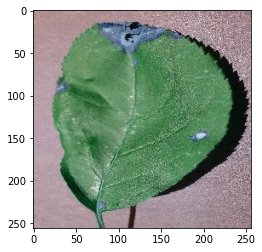

In [12]:
plt.imshow(img)
plt.show()

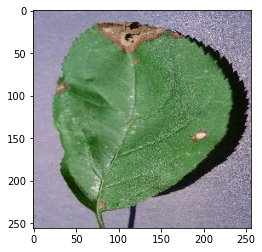

In [13]:
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.show()

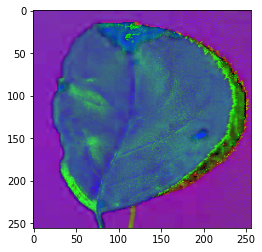

In [14]:
img_hsv = cv2.cvtColor(img_1,cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.show()

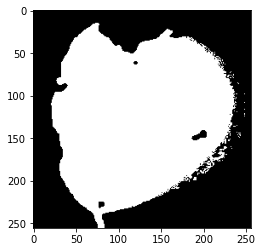

In [15]:
lg = np.array([25,0,20])
ug = np.array([100,255,255])
mask = cv2.inRange(img_hsv,lg,ug)
plt.imshow(mask,cmap='gray')
plt.show()

In [16]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
img_f = cv2.bitwise_and(img_1,img_1,mask = mask)

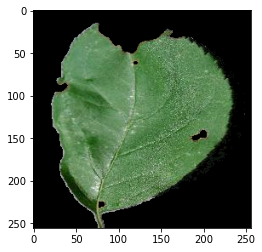

In [18]:
plt.imshow(img_f)
plt.show()

Wall time: 0 ns


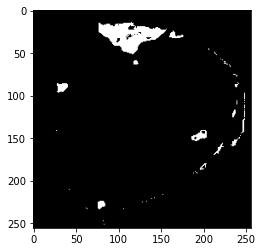

In [49]:
%time
lb = np.array([10,0,10])
ub = np.array([30,255,255])
mask2 = cv2.inRange(img_hsv,lb,ub)
img_b = cv2.bitwise_and(img_1,img_1,mask = mask2)
plt.imshow(mask2,cmap = 'gray')
plt.show()

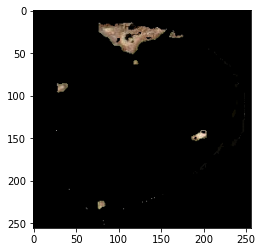

In [20]:
plt.imshow(img_b)
plt.show()

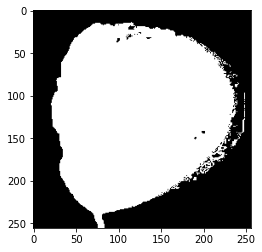

In [21]:
mask_t = mask+mask2
plt.imshow(mask_t,cmap = 'gray')
plt.show()

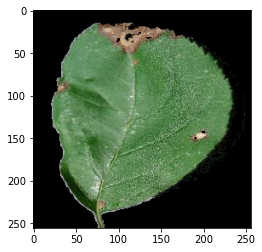

In [22]:
img_fi = cv2.bitwise_and(img_1,img_1,mask = mask_t)
plt.imshow(img_fi)
plt.show()

In [48]:
%time
import mahotas
bins = 8

Wall time: 0 ns


In [25]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [26]:
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [27]:
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [50]:
import time
start = time.time()
fv_mom = fd_hu_moments(img_1)
fv_text = fd_haralick(img_1)
fv_hist = fd_histogram(img_1)
end = time.time()
print(end-start)

0.05661749839782715


In [30]:
print(fv_mom)
print(fv_mom.size)

[ 1.39633436e-03  9.74959698e-10  2.32556568e-12  5.52524189e-12
 -1.98015366e-23 -1.72404509e-16 -4.08414822e-25]
7


In [32]:
print(fv_text)
print(fv_text.size)

[ 2.81335196e-04  5.40756473e+02  8.19992360e-01  1.50197529e+03
  1.32885019e-01  2.52838640e+02  5.46714469e+03  7.86608428e+00
  1.27669317e+01  1.48610287e-04  5.27110676e+00 -1.75807377e-01
  9.55724538e-01]
13


In [33]:
fv_hist
print(fv_hist.size)

512


In [34]:
features = np.hstack([fv_mom,fv_text,fv_hist])

In [35]:
features.size

532